In [1]:
import qim3d

### Blob detection notebook

This notebook shows how to do **blob detection** in a 3D volume using the `qim3d` library. 

Blob detection is done by initializing a `qim3d.processing.Blob` object, and then calling the `qim3d.processing.Blob.detect` method. The `qim3d.processing.Blob.detect` method detects blobs by using the Difference of Gaussian (DoG) blob detection method, and returns an array `blobs` with the blobs found in the volume stored as `(p, r, c, radius)`. Subsequently, a binary mask of the volume can be retrieved with the `qim3d.processing.get_mask` method, in which the found blobs are marked as `True`.

### **Example 1**: Blob detection in cement volume

**Applying Gaussian filter to volume**

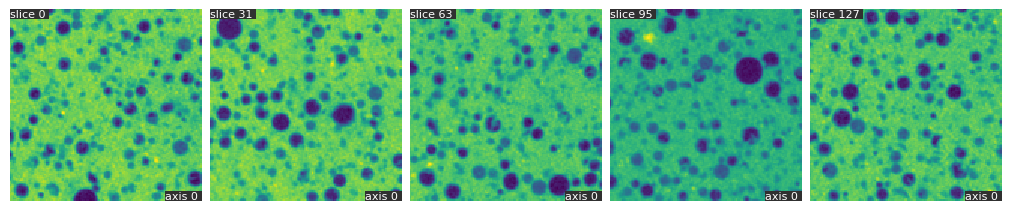

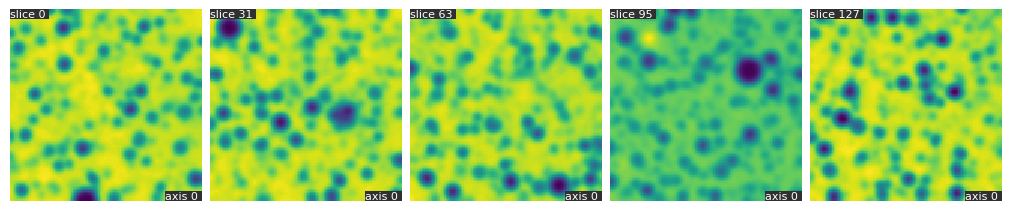

In [4]:
# Import 3D volume of cement
cement = qim3d.examples.cement_128x128x128

# Visualize slices of the original cement volume
qim3d.viz.slices(cement, n_slices = 5, show = True)

# Apply Gaussian filter to the cement volume
cement_filtered = qim3d.processing.gaussian(cement, sigma = 2)

# Visualize slices of the filtered cement volume
qim3d.viz.slices(cement_filtered)

**Detecting blobs in volume**

In [12]:
# Initialize blob detector
blob_detector = qim3d.processing.Blob(
    background = "bright", 
    min_sigma = 1, 
    max_sigma = 8, 
    threshold = 0.001, 
    overlap = 0.1
    )

# Detect blobs in filtered volume
blobs = blob_detector.detect(vol = cement_filtered)

# Number of blobs found
print(f'Number of blobs found in the volume: {len(blobs)} blobs')

Number of blobs found in the volume: 1813 blobs


In [13]:
# Visualize blobs on slices of cement volume
qim3d.viz.detection.circles(blobs, cement, show = True)

interactive(children=(IntSlider(value=64, description='Slice', max=127), Output()), layout=Layout(align_items=…

**Get binary mask of detected blobs**

In [14]:
# Get binary mask of detected blobs
mask = blob_detector.get_mask()

# Visualize mask
qim3d.viz.slicer(mask)

interactive(children=(IntSlider(value=64, description='Slice', max=127), Output()), layout=Layout(align_items=…